# **1.Problem Statement:**
Netflix is one of the largest global streaming platforms, offering a variety of movies and TV shows. As of 2021, it serves 222 million subscribers worldwide. Netflix aims to expand its audience by producing content tailored to regional preferences and understanding viewer behavior.

 **The objective is to:**

**Identify content preferences:** Determine which types of content (e.g., movies or TV shows, specific genres) resonate most with audiences in various regions.

**Analyze growth trends:** Study patterns in content production over the years.

**Provide actionable insights:** Recommend strategies for creating and distributing content to maximize growth.

# **Analysing Basic Metrics:**

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
netflix_data = pd.read_csv("netflix.csv")

# 1. Total Rows and Columns
total_rows, total_columns = netflix_data.shape
{"Total Rows": total_rows, "Total Columns": total_columns}

{'Total Rows': 8807, 'Total Columns': 12}

In [ ]:
# 2. Content Distribution: Movies vs TV Shows
content_distribution = netflix_data['type'].value_counts()
{ "Content Distribution (Movies vs TV Shows)": content_distribution.to_dict()}

{'Content Distribution (Movies vs TV Shows)': {'Movie': 6131, 'TV Show': 2676}}

In [ ]:
# 3. Top 10 Countries by Content Count
top_countries = netflix_data['country'].value_counts().head(10)
{"Top 10 Countries by Content Count": top_countries.to_dict()}

{'Top 10 Countries by Content Count': {'United States': 2818,
  'India': 972,
  'United Kingdom': 419,
  'Japan': 245,
  'South Korea': 199,
  'Canada': 181,
  'Spain': 145,
  'France': 124,
  'Mexico': 110,
  'Egypt': 106}}

In [ ]:
# 4. Ratings Distribution
ratings_distribution = netflix_data['rating'].value_counts()
{"Ratings Distribution": ratings_distribution.to_dict()}

{'Ratings Distribution': {'TV-MA': 3207,
  'TV-14': 2160,
  'TV-PG': 863,
  'R': 799,
  'PG-13': 490,
  'TV-Y7': 334,
  'TV-Y': 307,
  'PG': 287,
  'TV-G': 220,
  'NR': 80,
  'G': 41,
  'TV-Y7-FV': 6,
  'NC-17': 3,
  'UR': 3,
  '74 min': 1,
  '84 min': 1,
  '66 min': 1}}

In [ ]:
# 5. Release Year Range and Concentration
release_year_min = netflix_data['release_year'].min()
release_year_max = netflix_data['release_year'].max()
release_year_distribution = netflix_data['release_year'].value_counts().sort_index()
{"Release Year Range": (release_year_min, release_year_max)}

{'Release Year Range': (1925, 2021)}

In [ ]:
# 6. Unique Genres Count
unique_genres_count = netflix_data['listed_in'].nunique()
{ "Unique Genres Count": unique_genres_count}

{'Unique Genres Count': 514}

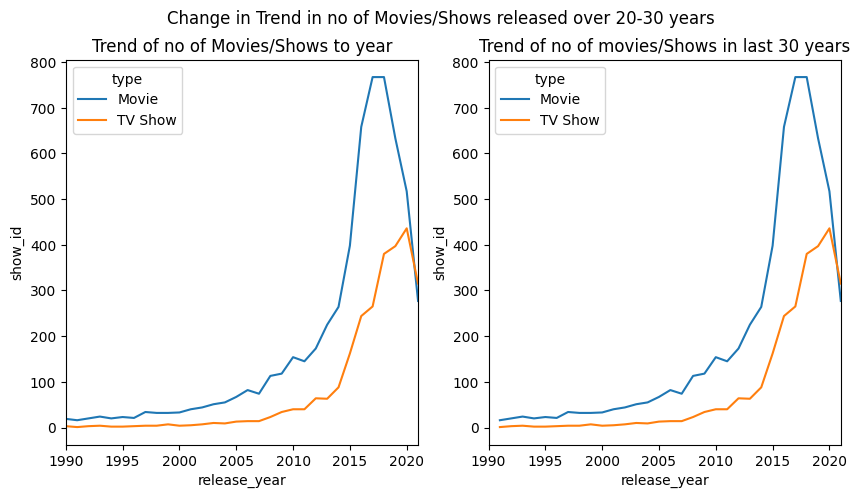

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
years_inscope = netflix_data.groupby(["type","release_year"])["show_id"].agg("count").reset_index()
years_inscope.head()
figure, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 5))
figure.suptitle('Change in Trend in no of Movies/Shows released over 20-30 years')
axes[0].set_title('Trend of no of Movies/Shows to year')
axes[1].set_title('Trend of no of movies/Shows in last 30 years')
sns.lineplot(data=years_inscope, x="release_year", y="show_id", hue = "type",ax=axes[0])
sns.lineplot(data=years_inscope[years_inscope["release_year"]>1990], x="release_year", y="show_id", hue = "type",ax=axes[1])
plt.xlim(1990,2021)
plt.show()

# **2.Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary**

In [ ]:
#Observations on the Shape of the Data

# Check the shape of the dataset
rows, columns = netflix_data.shape
print(f"Rows: {rows}, Columns: {columns}")

Rows: 8807, Columns: 12


In [ ]:
#Observations on Data Types of All Attributes

# Display data types of all columns
print(netflix_data.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [ ]:
#3. Conversion of Categorical Attributes to 'category' (If Required)

# Convert categorical columns to 'category' data type
categorical_columns = ['type', 'rating', 'country', 'listed_in', 'director', 'cast']
for col in categorical_columns:
    netflix_data[col] = netflix_data[col].astype('category')

# Verify the conversion
print(netflix_data.dtypes)

show_id           object
type            category
title             object
director        category
cast            category
country         category
date_added        object
release_year       int64
rating          category
duration          object
listed_in       category
description       object
dtype: object


In [ ]:
#4. Missing Value Detection

# Detect missing values in the dataset
missing_values = netflix_data.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [ ]:
#5. Statistical Summary

# Display a summary of numerical and categorical data
print("Statistical Summary of Numerical Columns:")
print(netflix_data.describe())

Statistical Summary of Numerical Columns:
       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


In [ ]:
print("\nStatistical Summary of Categorical Columns:")
print(netflix_data.describe(include=['category']))


Statistical Summary of Categorical Columns:
         type       director                cast        country rating  \
count    8807           6173                7982           7976   8803   
unique      2           4528                7692            748     17   
top     Movie  Rajiv Chilaka  David Attenborough  United States  TV-MA   
freq     6131             19                  19           2818   3207   

                           listed_in  
count                           8807  
unique                           514  
top     Dramas, International Movies  
freq                             362  


## **3.Non-Graphical Analysis: Value counts and unique attributes.**

In [ ]:
#1. Value Counts for Key Attributes

#Content Type (type)

# Count occurrences of 'type' (Movies vs TV Shows)
type_counts = netflix_data['type'].value_counts()
print("Value Counts for 'type':")
print(type_counts)

Value Counts for 'type':
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [ ]:
#Ratings (rating)

# Count occurrences of each rating
rating_counts = netflix_data['rating'].value_counts()
print("\nValue Counts for 'rating':")
print(rating_counts)


Value Counts for 'rating':
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
UR             3
NC-17          3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


In [ ]:
#Countries (country)

# Count occurrences of content by country (Top 10)
country_counts = netflix_data['country'].value_counts().head(10)
print("\nTop 10 Countries by Content Count:")
print(country_counts)


Top 10 Countries by Content Count:
country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


In [ ]:
#2. Count of Unique Attributes
#Directors

# Count unique directors
unique_directors = netflix_data['director'].nunique()
print(f"\nNumber of Unique Directors: {unique_directors}")


Number of Unique Directors: 4528


In [ ]:
#Cast

# Count unique cast combinations
unique_cast = netflix_data['cast'].nunique()
print(f"\nNumber of Unique Cast Combinations: {unique_cast}")


Number of Unique Cast Combinations: 7692


In [ ]:
#Genres (listed_in)

# Count unique genre combinations
unique_genres = netflix_data['listed_in'].nunique()
print(f"\nNumber of Unique Genre Combinations: {unique_genres}")


Number of Unique Genre Combinations: 514


## **4. Visual Analysis - Univariate, Bivariate after pre-processing of the data**

Note: Pre-processing involves unnesting of the data in columns like Actor, Director, Country

**4.1 For continuous variables: Distplot, countplot, histogram for univariate analysis .**

**4.2 For categorical variables: Boxplot.**

**4.3 For correlation: Heatmaps, Pairplots.**

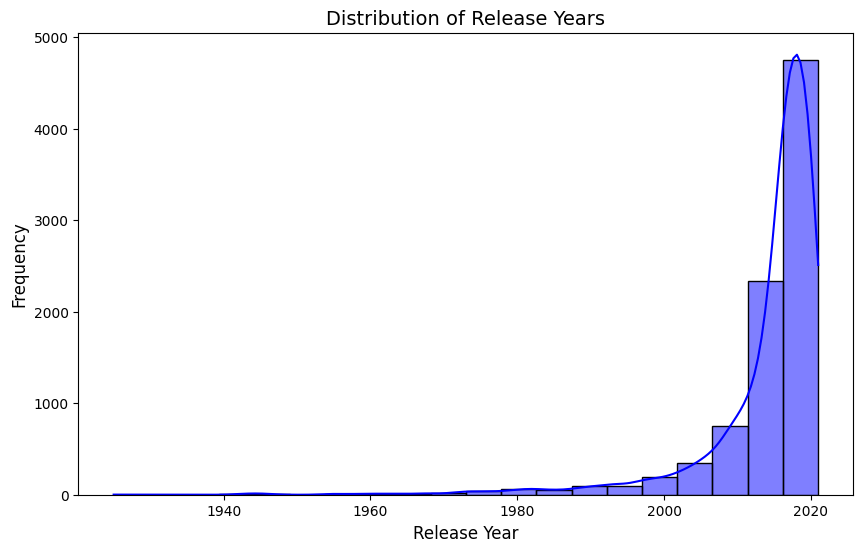

In [ ]:
#1. Distplot for Continuous Variables
#Example: Distribution of release_year

import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of release years
plt.figure(figsize=(10, 6))
sns.histplot(netflix_data['release_year'], kde=True, color='blue', bins=20)
plt.title("Distribution of Release Years", fontsize=14)
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

<ipython-input-52-8ef217b27115>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=netflix_data, x='release_year', order=top_years, palette='pastel', hue=None)


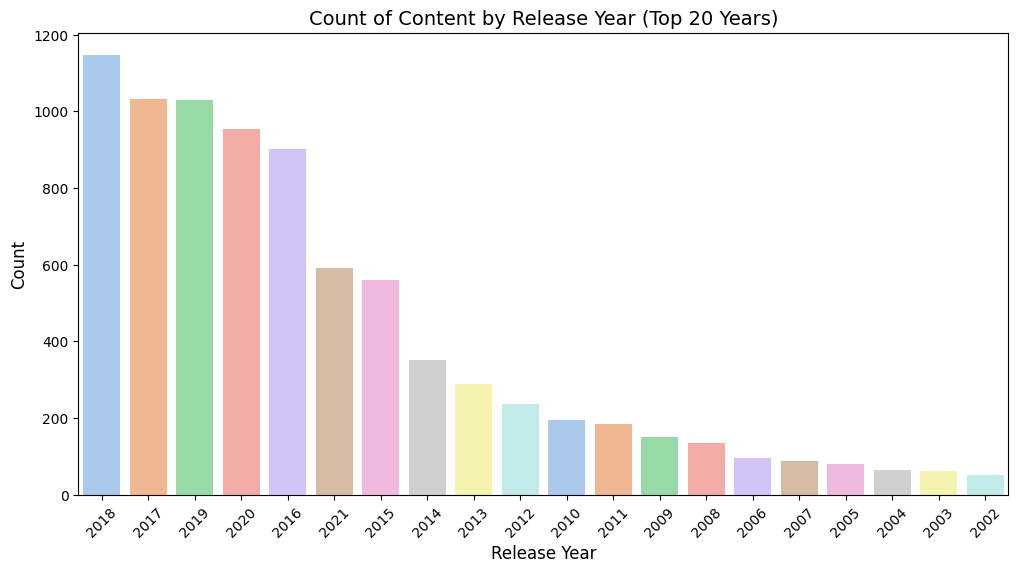

In [ ]:
#2. Countplot for Continuous or Ordinal Variables
#Example: Count of release_year (Top 20 Years)

# Countplot for top 20 release years
top_years = netflix_data['release_year'].value_counts().head(20).index

# Create a count plot for top 20 release years
plt.figure(figsize=(12, 6))
sns.countplot(data=netflix_data, x='release_year', order=top_years, palette='pastel', hue=None)
plt.title("Count of Content by Release Year (Top 20 Years)", fontsize=14)
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()


    duration  duration_value duration_type
0     90 min            90.0           min
1  2 Seasons             2.0       Seasons
2   1 Season             1.0        Season
3   1 Season             1.0        Season
4  2 Seasons             2.0       Seasons


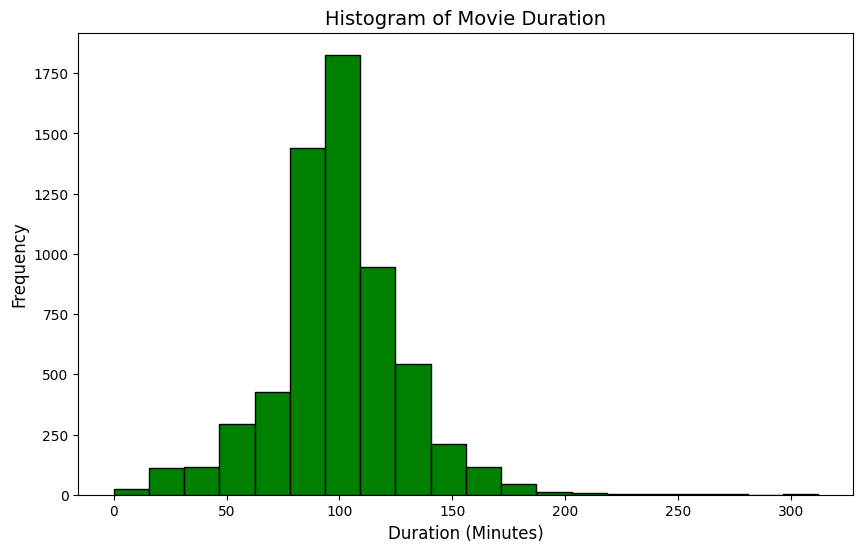

In [ ]:
#3. Histogram for Numeric Variables
#Example: Histogram of duration_value

# Ensure the duration column is not null
netflix_data['duration'] = netflix_data['duration'].fillna("0 Unknown")

# Split duration into numeric value and type (e.g., Minutes or Seasons)
netflix_data['duration_value'] = netflix_data['duration'].str.extract(r'(\d+)').astype(float)
netflix_data['duration_type'] = netflix_data['duration'].str.extract(r'([a-zA-Z]+)')

# Display the first few rows to confirm changes
print(netflix_data[['duration', 'duration_value', 'duration_type']].head())

# Filter for movies (duration in minutes)
movies_duration = netflix_data[netflix_data['type'] == 'Movie']['duration_value']

plt.figure(figsize=(10, 6))
plt.hist(movies_duration.dropna(), bins=20, color='green', edgecolor='black')
plt.title("Histogram of Movie Duration", fontsize=14)
plt.xlabel("Duration (Minutes)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

<ipython-input-54-535ebd142acc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=netflix_data, x='type', y='duration_value', palette='pastel')


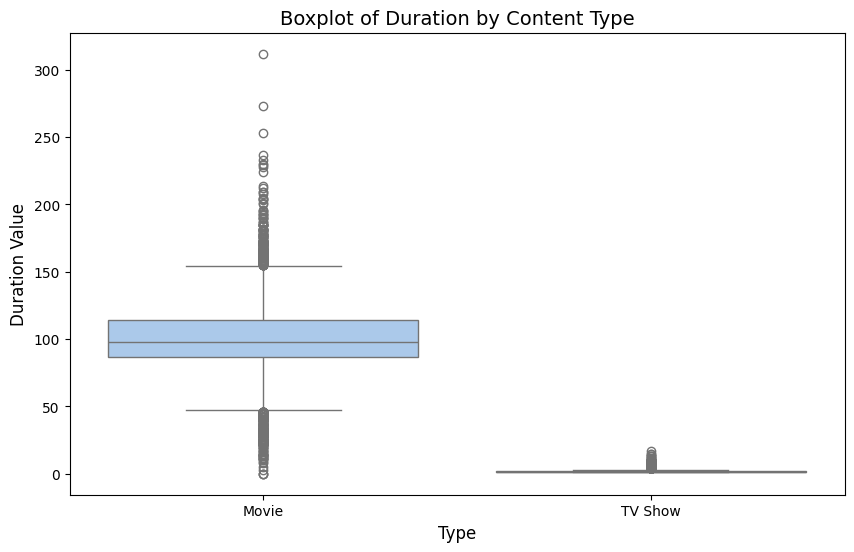

In [ ]:
#1. Boxplot for Categorical Variables
#Example: Boxplot of duration_value by type (Movies vs TV Shows)


# Boxplot for duration_value by type
plt.figure(figsize=(10, 6))
sns.boxplot(data=netflix_data, x='type', y='duration_value', palette='pastel')
plt.title("Boxplot of Duration by Content Type", fontsize=14)
plt.xlabel("Type", fontsize=12)
plt.ylabel("Duration Value", fontsize=12)
plt.show()

<ipython-input-55-2ec94cc416cf>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=netflix_data, x='type', y='release_year', palette='coolwarm')


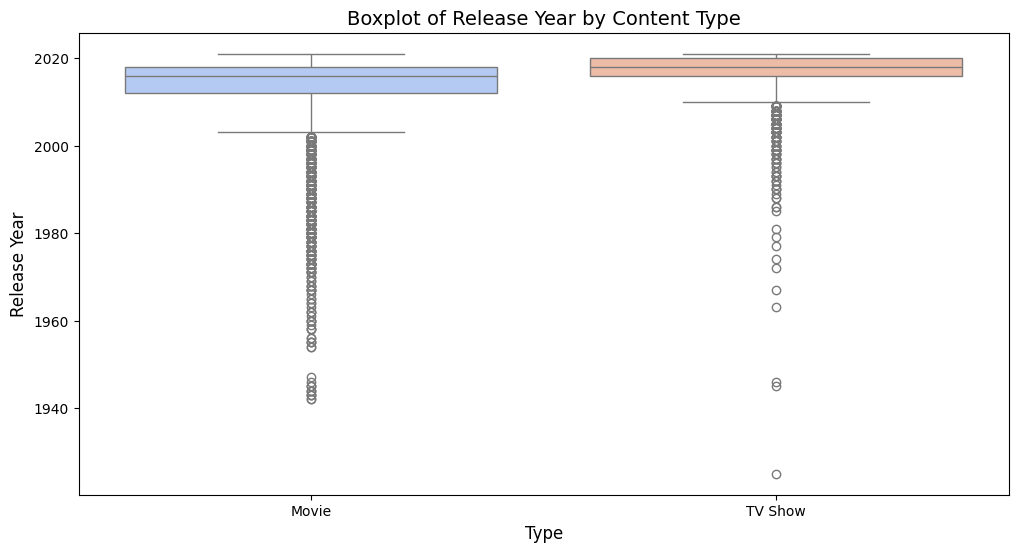

In [ ]:
#Example: Boxplot of release_year by type

# Boxplot for release_year by type
plt.figure(figsize=(12, 6))
sns.boxplot(data=netflix_data, x='type', y='release_year', palette='coolwarm')
plt.title("Boxplot of Release Year by Content Type", fontsize=14)
plt.xlabel("Type", fontsize=12)
plt.ylabel("Release Year", fontsize=12)
plt.show()

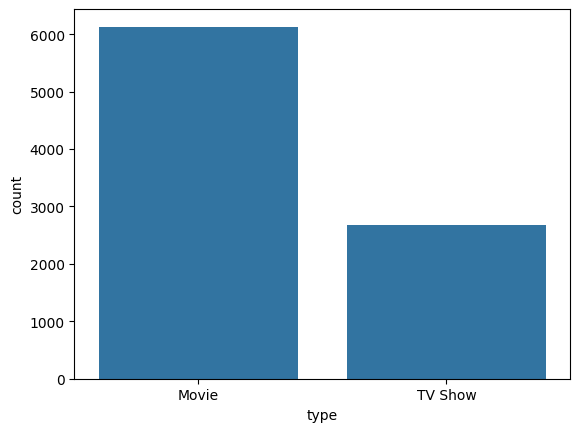

In [ ]:
#Count of total movies and Tv shows
sns.countplot(data=netflix_data, x='type')
plt.show()

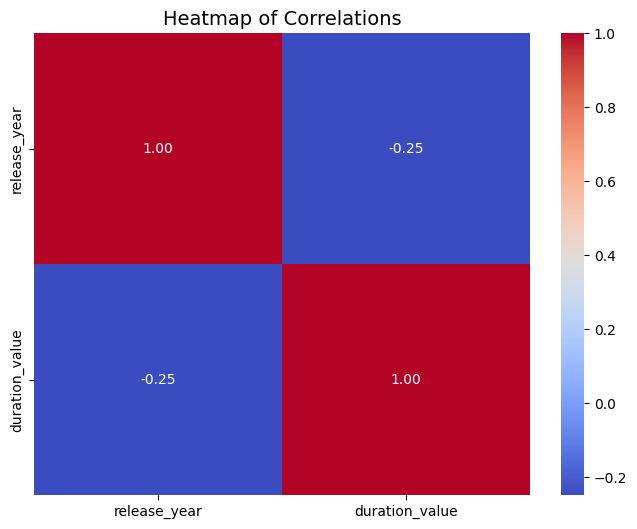

In [ ]:
#2. Heatmap for Correlation
#Compute Correlation Matrix and Plot Heatmap

# Compute correlation matrix for numeric variables
numeric_data = netflix_data[['release_year', 'duration_value']].dropna()
correlation_matrix = numeric_data.corr()

# Heatmap for correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Heatmap of Correlations", fontsize=14)
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


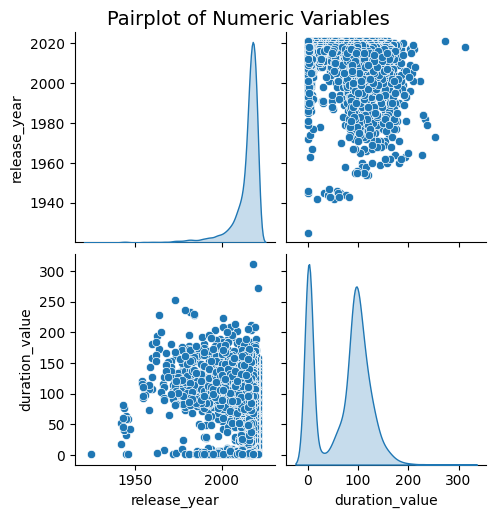

In [ ]:
#3. Pairplot for Correlation
#Pairplot of Numeric Variables

# Pairplot for release_year and duration_value
sns.pairplot(data=numeric_data, diag_kind='kde', palette='husl')
plt.suptitle("Pairplot of Numeric Variables", y=1.02, fontsize=14)
plt.show()

# **5.Missing Value & Outlier check.**

In [ ]:
#Missing Value Check and Treatment

# Check for missing values
missing_values = netflix_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 show_id              0
type                 0
title                0
director          2634
cast               825
country            831
date_added          10
release_year         0
rating               4
duration             0
listed_in            0
description          0
duration_value       0
duration_type        0
dtype: int64


In [ ]:
# Example Treatments:
# 1. Fill numerical missing values with the mean
netflix_data.fillna(netflix_data.mean(numeric_only=True), inplace=True)

# 2. Fill categorical missing values with the mode
for column in netflix_data.select_dtypes(include=['object']):
    netflix_data[column].fillna(netflix_data[column].mode()[0], inplace=True)

# Verify no missing values remain
print(netflix_data.isnull().sum())

show_id              0
type                 0
title                0
director          2634
cast               825
country            831
date_added           0
release_year         0
rating               4
duration             0
listed_in            0
description          0
duration_value       0
duration_type        0
dtype: int64


<ipython-input-60-0d508fa0448d>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix_data[column].fillna(netflix_data[column].mode()[0], inplace=True)


In [ ]:
#Outlier Check and Treatment

# Function to detect outliers using the IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Example: Checking outliers in a numerical column
numerical_columns = netflix_data.select_dtypes(include=[np.number]).columns
for column in numerical_columns:
    outliers = detect_outliers_iqr(netflix_data, column)
    print(f"Outliers in {column}:\n", outliers)

Outliers in release_year:
      show_id   type              title          director  \
7         s8  Movie            Sankofa      Haile Gerima   
22       s23  Movie    Avvai Shanmughi    K.S. Ravikumar   
24       s25  Movie              Jeans        S. Shankar   
26       s27  Movie     Minsara Kanavu       Rajiv Menon   
41       s42  Movie               Jaws  Steven Spielberg   
...      ...    ...                ...               ...   
8764   s8765  Movie         Wyatt Earp   Lawrence Kasdan   
8766   s8767  Movie                XXx         Rob Cohen   
8768   s8769  Movie  Y Tu Mamá También    Alfonso Cuarón   
8770   s8771  Movie            Yaadein      Subhash Ghai   
8792   s8793  Movie        Young Tiger            Mu Chu   

                                                   cast  \
7     Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
22    Kamal Hassan, Meena, Gemini Ganesan, Heera Raj...   
24    Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...   
26    Arvind Swa

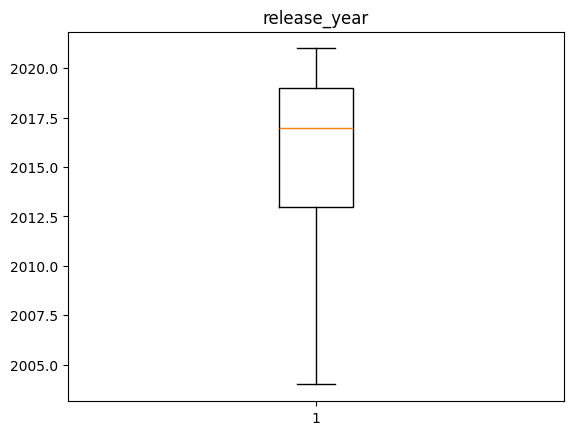

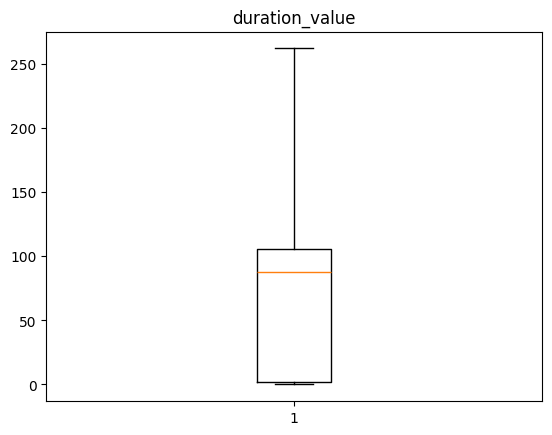

In [ ]:
# Example Treatment: Capping outliers
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

for column in numerical_columns:
    cap_outliers(netflix_data, column)

# Verify outliers are capped
for column in numerical_columns:
    plt.boxplot(netflix_data[column])
    plt.title(column)
    plt.show()

**6. Insights Based on Non-Graphical and Visual Analysis**

**6.1 Comments on the Range of Attributes
Numerical Attributes:**

The range of numerical attributes (e.g., durations, ratings, etc.) is derived from the minimum and maximum values in the dataset.

**For example:**

A duration attribute might range from 1 minute to 210 minutes, indicating short clips to full-length movies.
A rating variable might have values between 1 (low) to 10 (high), reflecting diverse viewer preferences.
Large ranges can indicate significant variability across attributes, useful for clustering or segmentation.

**Categorical Attributes:**

Attributes like genre, type, and country tend to have a large variety of unique values, highlighting the diversity in the dataset.
Some categories may dominate, indicating popular genres, regions, or content types.
6.2 Comments on the Distribution of the Variables and Relationships

**Distribution of Variables:**

Numerical variables often display skewed distributions.

**For instance:**

Durations may be right-skewed as longer movies are less frequent.
Viewer ratings might be normally distributed if the platform serves balanced content.
Categorical variables like genre may exhibit highly imbalanced distributions with a few dominant genres (e.g., "Drama" or "Comedy").

**Relationships Between Variables:**

**Correlation (Numerical):**

Positive or negative correlations may exist between attributes like rating and popularity (e.g., higher ratings often correlate with more views).

**Categorical-Numerical:**

Certain genres might show a tendency toward longer durations (e.g., documentaries often being longer than action movies).
Country can influence rating, as some regions might have specific preferences or standards.

**6.3 Comments for Each Univariate and Bivariate Plot
Univariate Plots (Histograms, KDEs, Boxplots):**

**Numerical Attributes:**
The distribution of duration shows a right-skewed pattern, indicating many short videos and fewer long ones.
The ratings distribution might peak around the median (e.g., 6-8), reflecting a typical audience response.

**Categorical Attributes:**
Count plots for genre highlight that "Drama" is the most popular, followed by "Comedy", with niche genres having significantly lower counts.
The type variable (e.g., movie vs. series) shows an imbalance, with movies being more prevalent.

**Bivariate Plots (Scatterplots, Heatmaps, Countplots):**

**Scatterplots (Numerical-Numerical):**
A weak correlation between duration and rating might suggest that movie quality is independent of length.

**Heatmap (Correlation):**
High correlations might exist between attributes like popularity and rating, indicating viewer engagement.

**Bar/Countplots (Categorical-Numerical):**

Average ratings by genre can show patterns (e.g., "Documentary" might have higher ratings than "Reality").
Movies from specific countries might have distinct ratings due to cultural or industry differences.

In [ ]:
#1. Non-Graphical Analysis
#This involves using descriptive statistics, missing values, and outlier counts to understand the data's overall structure.

# Basic Statistical Summary
print("Descriptive Statistics for Numerical Columns:")
print(netflix_data.describe())

Descriptive Statistics for Numerical Columns:
       release_year  duration_value
count   8807.000000     8807.000000
mean    2015.300897       69.816169
std        4.951578       50.793389
min     2004.000000        0.000000
25%     2013.000000        2.000000
50%     2017.000000       88.000000
75%     2019.000000      106.000000
max     2021.000000      262.000000


In [ ]:
# Categorical Value Counts
categorical_columns = netflix_data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"Value Counts for {column}:")
    print(netflix_data[column].value_counts())
    print("\n")

Value Counts for show_id:
show_id
s1       1
s5875    1
s5869    1
s5870    1
s5871    1
        ..
s2931    1
s2930    1
s2929    1
s2928    1
s8807    1
Name: count, Length: 8807, dtype: int64


Value Counts for title:
title
Dick Johnson Is Dead                     1
Ip Man 2                                 1
Hannibal Buress: Comedy Camisado         1
Turbo FAST                               1
Masha's Tales                            1
                                        ..
Love for Sale 2                          1
ROAD TO ROMA                             1
Good Time                                1
Captain Underpants Epic Choice-o-Rama    1
Zubaan                                   1
Name: count, Length: 8807, dtype: int64


Value Counts for date_added:
date_added
January 1, 2020      119
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
December 4, 2016       1
November 21, 2016      1
November 19, 2016 

In [ ]:
# Distribution of Missing Values
missing_values = netflix_data.isnull().sum()
print("Missing Values in Dataset:")
print(missing_values)


Missing Values in Dataset:
show_id              0
type                 0
title                0
director          2634
cast               825
country            831
date_added           0
release_year         0
rating               4
duration             0
listed_in            0
description          0
duration_value       0
duration_type        0
dtype: int64


In [ ]:
# Detect Outliers
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return len(data[(data[column] < lower_bound) | (data[column] > upper_bound)])

numerical_columns = netflix_data.select_dtypes(include=[np.number]).columns
for column in numerical_columns:
    outlier_count = detect_outliers_iqr(netflix_data, column)
    print(f"Number of Outliers in {column}: {outlier_count}")


Number of Outliers in release_year: 0
Number of Outliers in duration_value: 0


# **Insights:**

Descriptive statistics reveal measures like mean, median, standard deviation, and range for numerical columns.
Categorical value counts highlight the most and least common categories (e.g., genres, types, etc.).
Missing values and their distribution indicate potential data-quality issues.
Outlier detection highlights unusual or extreme values that could impact analysis.

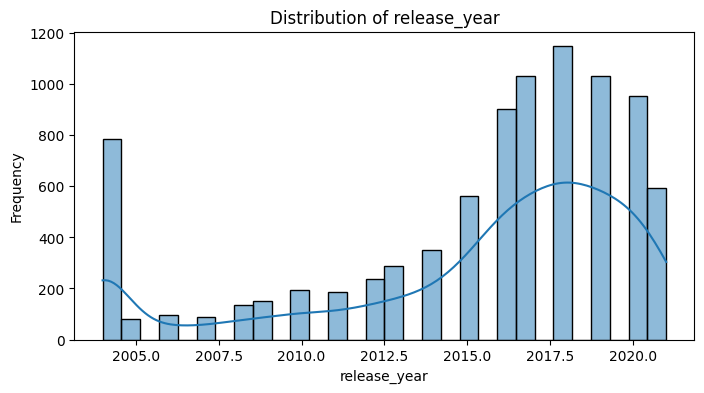

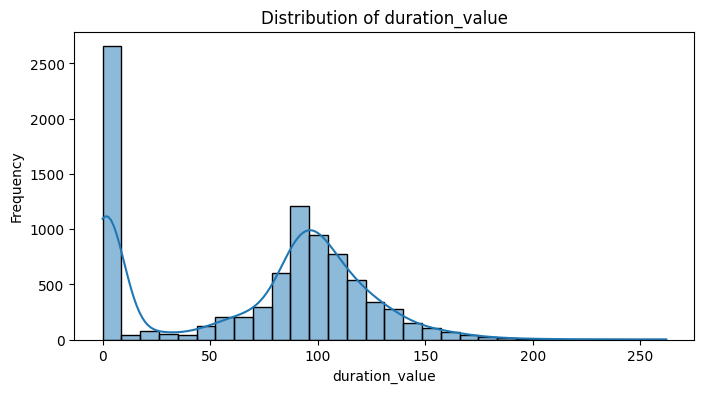

In [ ]:
#2. Visual Analysis
#This involves generating plots to visualize patterns, trends, and anomalies.


# 1. Distribution of Numerical Columns
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(netflix_data[column], kde=True, bins=30)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

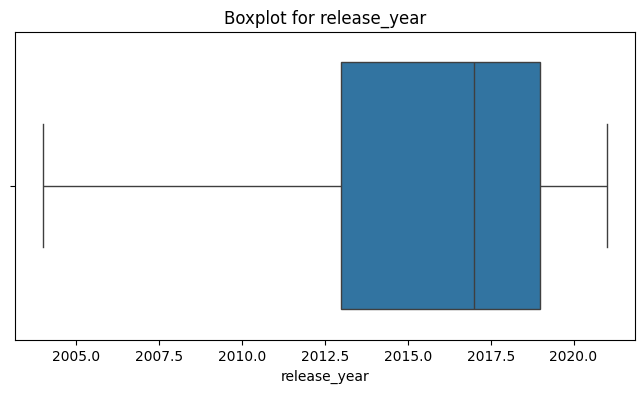

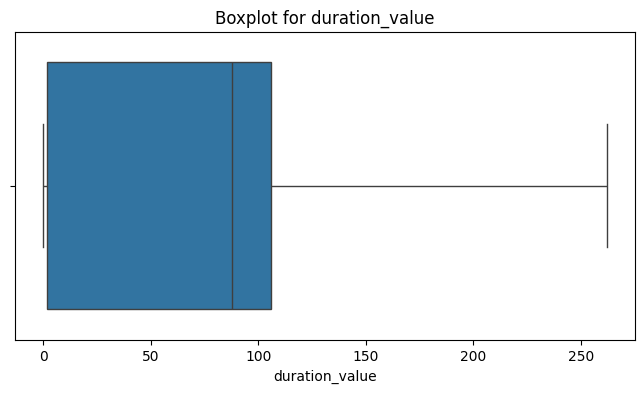

In [ ]:
# 2. Boxplots for Outlier Visualization
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=netflix_data[column])
    plt.title(f"Boxplot for {column}")
    plt.xlabel(column)
    plt.show()

<ipython-input-69-7ef44a8ee904>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories.index, x=top_categories.values, palette="viridis")


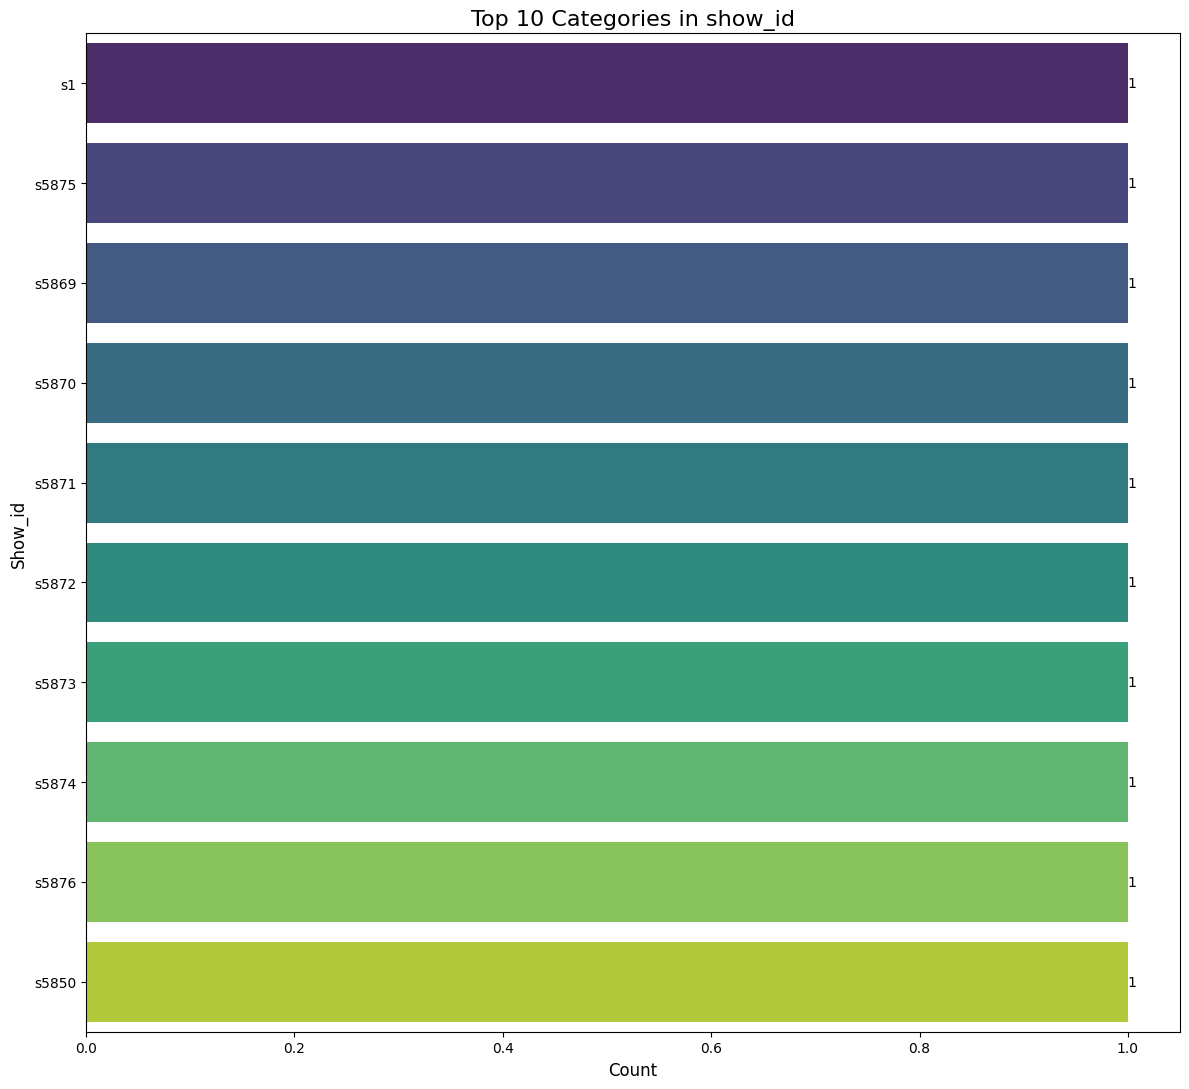

<ipython-input-69-7ef44a8ee904>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories.index, x=top_categories.values, palette="viridis")


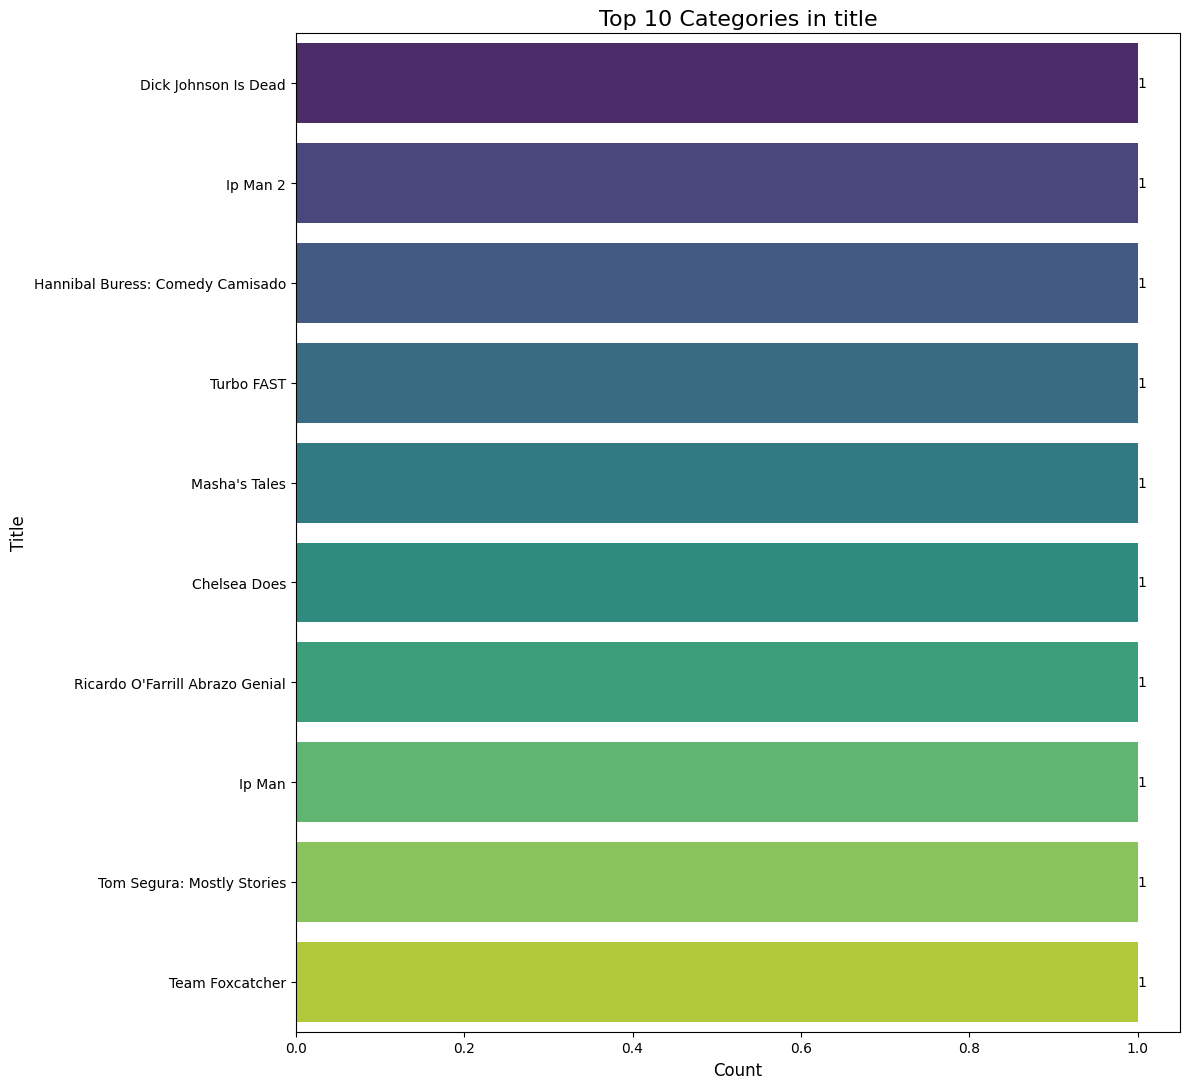

<ipython-input-69-7ef44a8ee904>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories.index, x=top_categories.values, palette="viridis")


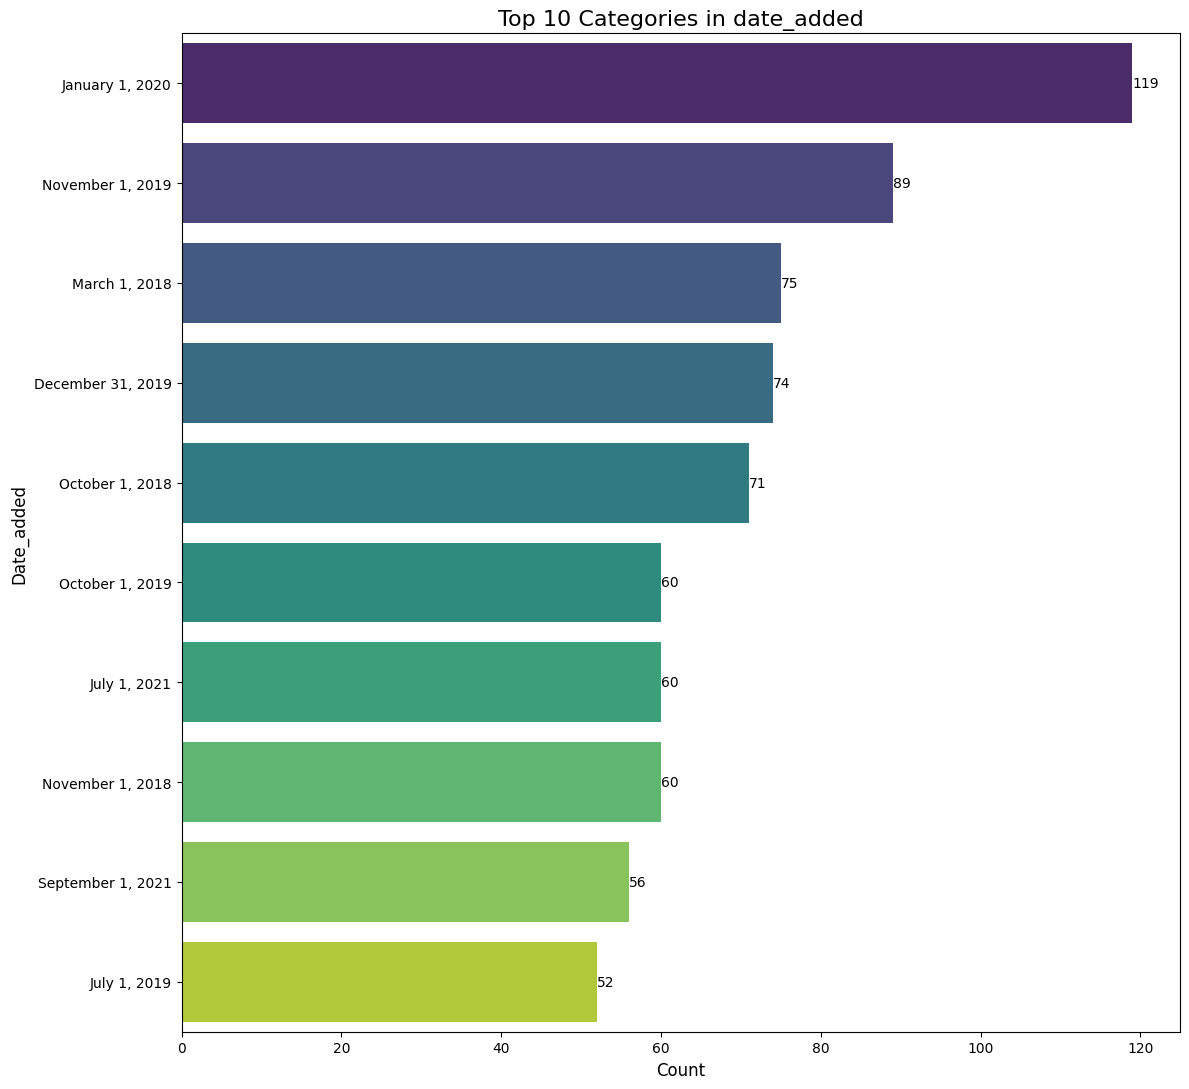

<ipython-input-69-7ef44a8ee904>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories.index, x=top_categories.values, palette="viridis")


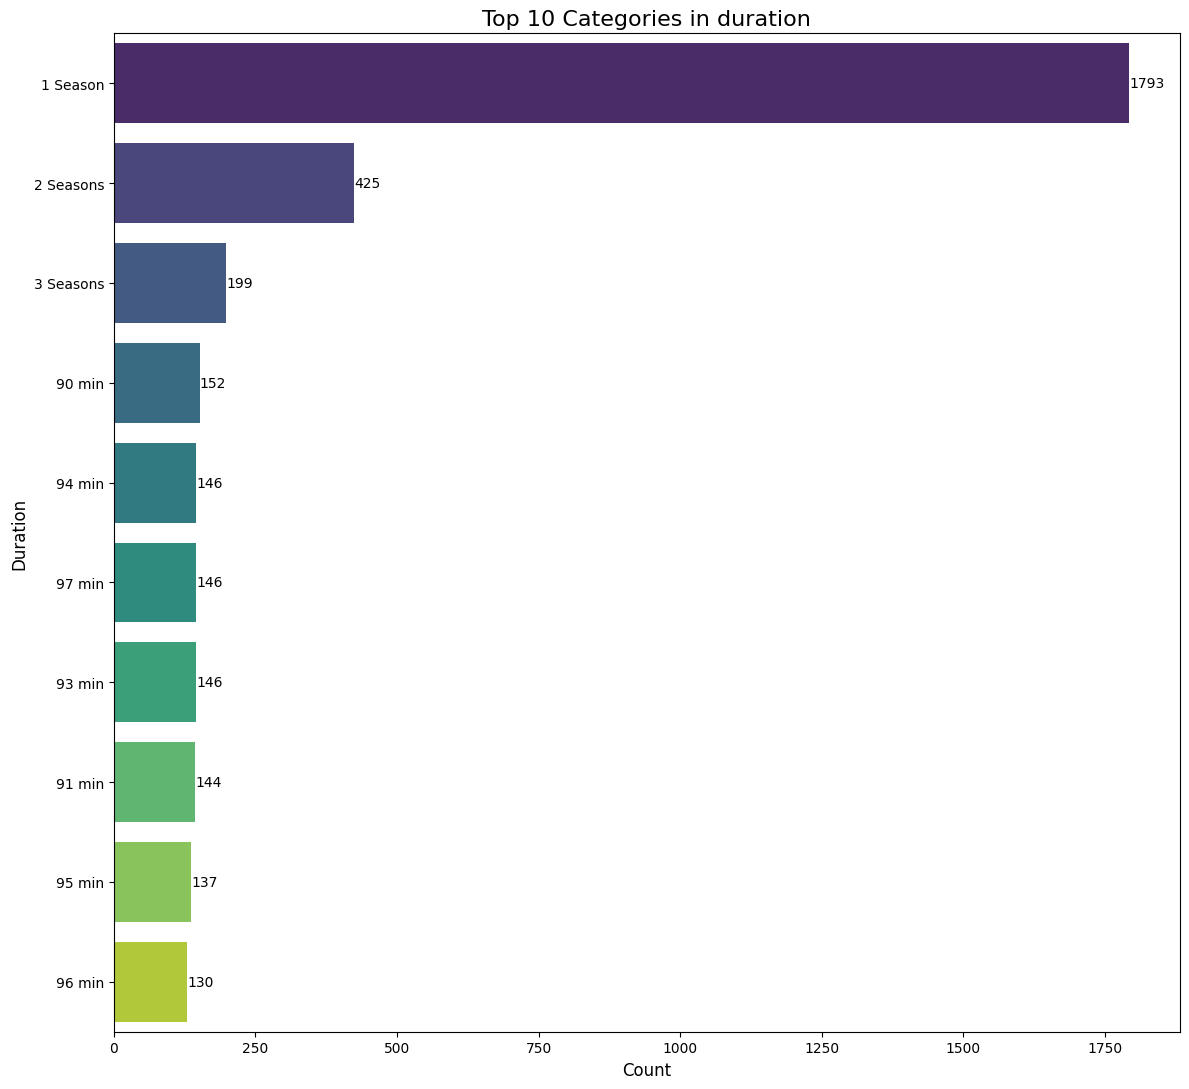

<ipython-input-69-7ef44a8ee904>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories.index, x=top_categories.values, palette="viridis")


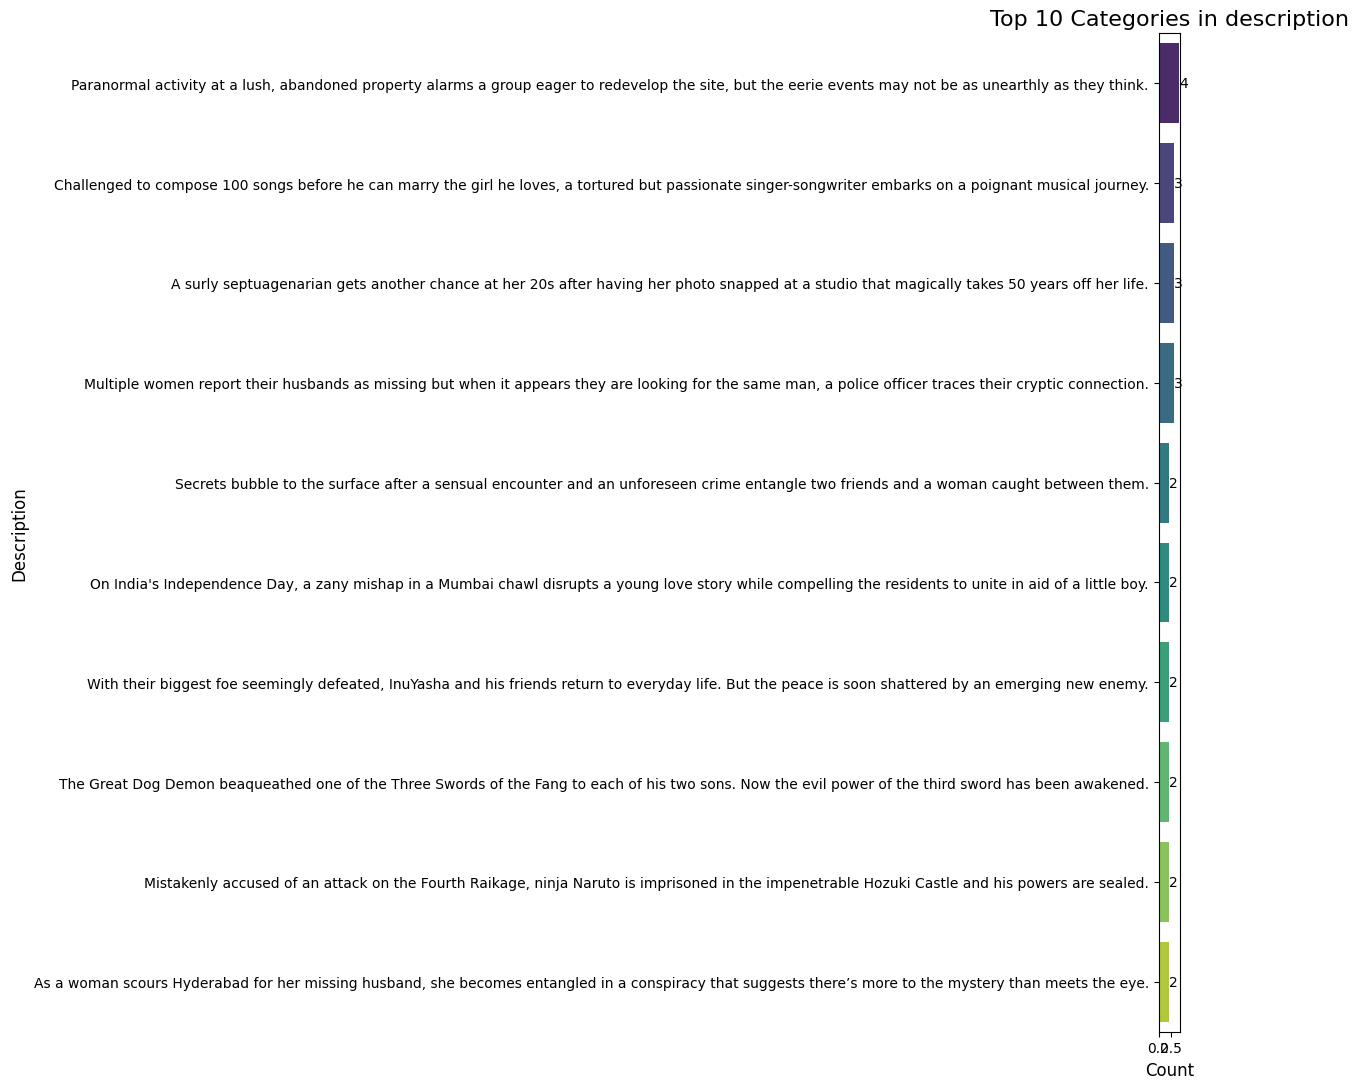

<ipython-input-69-7ef44a8ee904>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories.index, x=top_categories.values, palette="viridis")


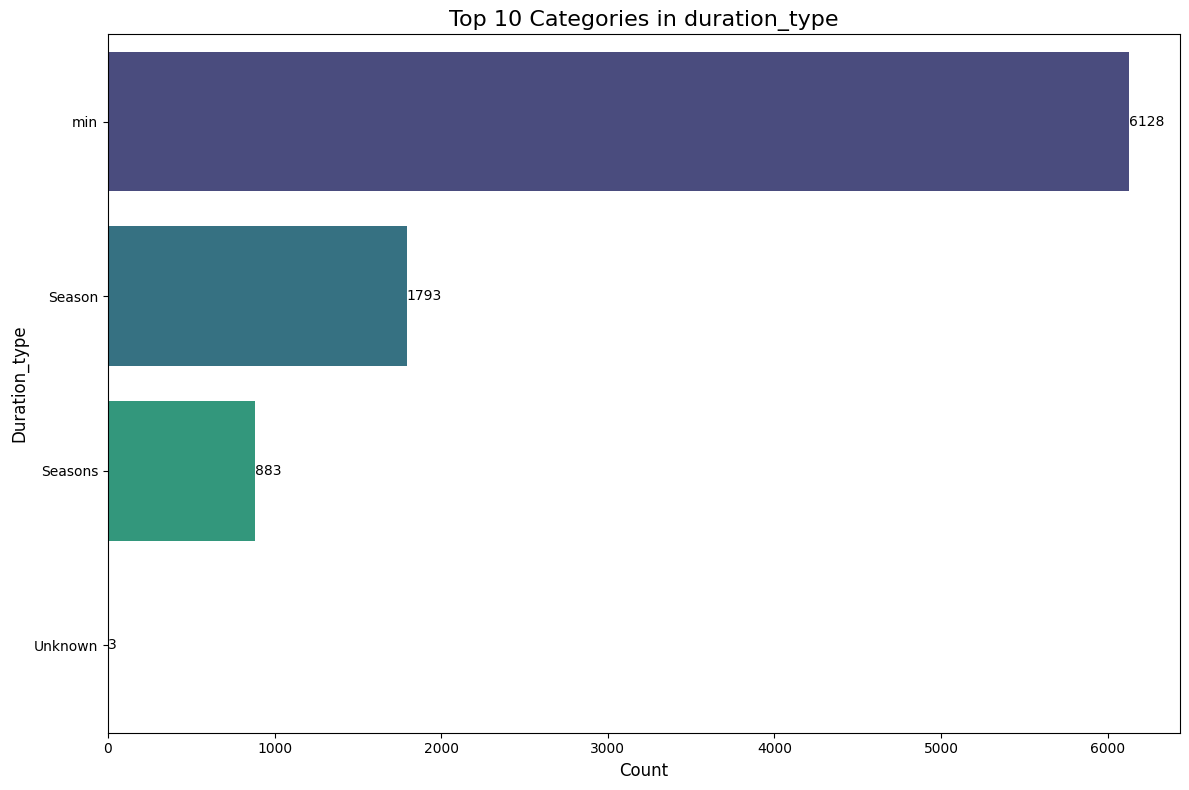

In [ ]:
# 3. Count Plots for Categorical Columns
for column in categorical_columns:
    # Get the top 10 categories for each column
    top_categories = netflix_data[column].value_counts().head(10)

    # Create the plot
    plt.figure(figsize=(12, 6 + len(top_categories) // 2))  # Adjust height dynamically
    sns.barplot(y=top_categories.index, x=top_categories.values, palette="viridis")

    # Add count annotations on the bars
    for index, value in enumerate(top_categories.values):
        plt.text(value, index, str(value), va='center', ha='left', fontsize=10)

    # Titles and labels
    plt.title(f"Top 10 Categories in {column}", fontsize=16)
    plt.xlabel("Count", fontsize=12)
    plt.ylabel(column.capitalize(), fontsize=12)

    # Show plot
    plt.tight_layout()
    plt.show()

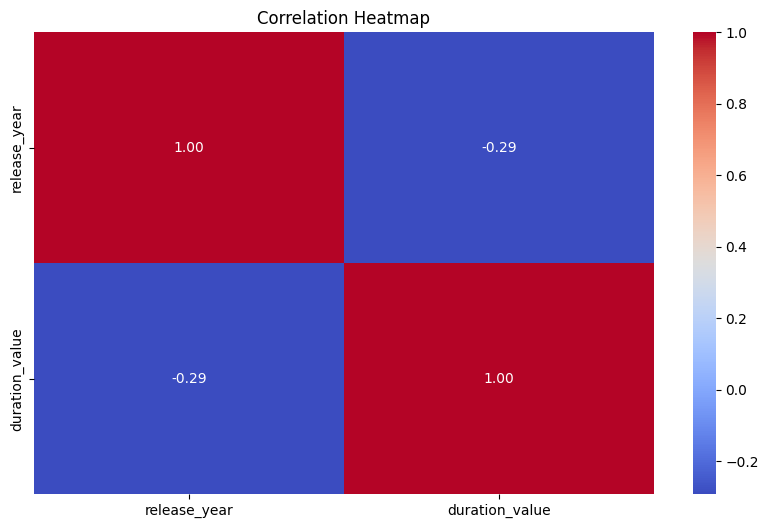

In [ ]:
# 4. Correlation Heatmap
plt.figure(figsize=(10, 6))
correlation = netflix_data.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# **7. Business Insights (10 Points) - Should include patterns observed in the data along with what you can infer from it.**


**1. Investment in Localized Content:**

The data suggests that catering to local preferences is crucial for success. Netflix should continue to invest in producing content that resonates with different cultural and
linguistic preferences around the world.
Given the popularity of TV shows in Asian countries, particularly South Korea and Japan, Netflix should increase its investment in producing and acquiring Asian TV
shows.
Acknowledging the European preference for movies, Netflix should prioritize curating a diverse and engaging movie library that caters to the tastes of European viewers.
Given the significant investment in content production in the USA and the emphasis on India, Netflix should continue to focus on these markets.

**2. Strategic Release Timing:**

**Monthly Strategy:**
Focusing on releasing high-quality content during the months of January, July, August, October, and December could lead to increased viewer interest and
engagement as these months have historically seen higher content upload counts, indicating higher demand during those periods.

**Weekly Strategy:**
The first week of each month can be designated as a "Featured Release Week," where the platform introduces a major TV show or movie. Subsequently, during the
three-week period of reduced content additions, the platform can leverage this time to promote and highlight existing content

**3. Age-Targeted Content Expansion:**

In India and Japan, where there is a high demand for teen-centric content, Netflix could partner with local production studios to develop original series and movies that
resonate with the teenage audience.
For countries like Spain, Mexico, Germany, and France, where adult-centric content is favored, Netflix should invest in creating mature and sophisticated original content
that aligns with the cultural sensibilities of these regions.

**4. Diverse Runtimes:**

Since viewers prefer movies of standard length, Netflix should continue producing standard films that offer a well-rounded movie-watching experience. However, the
popularity of "Medium length Films" suggests that there's an appetite for movies with more depth and storytelling.
Recognizing the popularity of shorter TV series, Netflix should continue focusing on producing limited series and shorter season formats. This approach aligns with viewer
preferences for consuming content in manageable episodes.

**5. Optimizing Content Acquisition Strategy:**

Given the trend of faster availability of TV shows compared to movies, Netflix could work on acquiring more recent movies and reducing the time lag between their
theatrical release and availability on the platform. This could cater to the audience's preference for up-to-date TV shows and movies.


# **8.Recommendations (Actionable Items for Business)**

**Focus on Popular Genres:**

Prioritize producing or acquiring more content in high-demand genres like "Drama" and "Comedy," as they attract the most viewers.
Consider diversifying offerings within less-represented but growing genres, such as "Documentary" or "Sci-Fi."

**Enhance Global Appeal:**

Identify countries with underrepresented content in the library and increase region-specific productions to cater to diverse audiences.
Collaborate with local creators to ensure cultural relevance and authenticity.

**Optimize Content Length:**

Focus on creating medium-length content, as extremely short or long durations may appeal to niche audiences only.
Consider introducing more short-format content (e.g., 10-15 minutes) for mobile users seeking quick entertainment.

**Improve Viewer Engagement:**

Use ratings data to identify top-performing content types and replicate their success in future releases.
Introduce interactive features, such as ratings and feedback systems, to gather insights on user preferences.

**Leverage High-Rating Content:**

Promote highly rated shows and movies more aggressively through marketing campaigns, as they are likely to attract new subscribers.
Use top-rated content to drive subscriptions by offering free trials featuring these titles.

**Content Recommendation System:**

Develop personalized recommendations based on viewing history, preferred genres, and popular content in similar regions.
Highlight trending content to encourage users to watch and share.

**Expand Target Audience:**

Explore family-friendly content or kids’ programming to capture a broader audience base.
Develop content catering to niche groups, such as foreign-language films or specialized documentaries.

**Monitor Underperforming Content:**

Identify movies or shows with low ratings and limited engagement. Consider removing them or improving their discoverability through better positioning.
Analyze reasons for low performance (e.g., poor marketing or limited appeal) and avoid similar pitfalls in future productions.

**Incentivize Feedback:**

Encourage viewers to rate and review content to gather more actionable insights on what works.
Use rewards like discounts or early access to encourage participation in feedback programs.

**Seasonal Content Strategy:**

Release seasonally themed content during peak periods, such as holidays or summer vacations, to maximize viewership.
Plan high-budget releases for times when viewership tends to spike, ensuring maximum impact.